In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score
ins_df=pd.read_csv('insurance_claims.csv')
y=ins_df['fraud_reported']
ins_df.drop(columns='fraud_reported',inplace=True)

In [62]:
cat_cols=[col for col in ins_df.columns if ins_df[col].dtype=='object']
con_cols=[col for col in ins_df.columns if ins_df[col].dtype=='int64' or ins_df[col].dtype=='float64']

In [36]:
#for col in cat_cols:
ins_df['collision_type'].value_counts().index.tolist()

['Rear Collision', 'Side Collision', 'Front Collision', '?']

In [52]:
# converting  'incident_hr_to_time' column to time and created new column and droped that old column
ins_df['incident_hr_to_time']=pd.to_datetime(ins_df['incident_hour_of_the_day'], format='%H')
ins_df['incident_hr_to_time']=pd.to_datetime(ins_df['incident_hr_to_time']).dt.time
ins_df['incident_hr_to_time']
ins_df.drop(columns='incident_hour_of_the_day',inplace=True)

In [55]:
# Replacing ? marks with NAN and then replace miss values with mode/mean
ins_df.replace("?", np.nan,inplace=True)
ins_df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

In [63]:
ins_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,incident_hr_to_time
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,05:00:00
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,08:00:00
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,07:00:00
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,05:00:00
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,20:00:00
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,23:00:00
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,04:00:00
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,02:00:00


In [53]:
x_train,x_test,y_train,y_test=train_test_split(ins_df,y,random_state=54,test_size=0.2)

In [66]:
for col in con_cols:
    x_train[col].fillna(x_train[col].mean(),inplace=True)
    x_test[col].fillna(x_train[col].mean(),inplace=True)
    
for col in cat_cols:
    x_train[col].fillna(x_train[col].mode()[0],inplace=True)
    x_test[col].fillna(x_train[col].mode()[0],inplace=True)

In [67]:
scaler=StandardScaler()

for col in con_cols:
    x_train[col]=scaler.fit_transform(np.array(x_train[col]).reshape(-1,1))
    x_test[col]=scaler.transform(np.array(x_test[col]).reshape(-1,1))

In [68]:
cat_encd_train=pd.get_dummies(x_train[cat_cols])
cat_encd_test=pd.get_dummies(x_test[cat_cols])

In [69]:
cat_encd_train_final,cat_encd_test_final=cat_encd_train.align(cat_encd_test,join='inner',axis=1)
cat_encd_test_final###aligning train & test data one hot encoded catg columns due to unqual no of columns i.e no of cilumns would differ for that we align to get same

,policy_bind_date_01-01-2006,policy_bind_date_03-01-2004,policy_bind_date_03-02-1997,policy_bind_date_05-08-1992,policy_bind_date_07-11-1997,policy_bind_date_09-03-2003,policy_bind_date_11-11-1998,policy_bind_date_14-04-1992,policy_bind_date_16-05-2008,policy_bind_date_20-09-1990,...,incident_hr_to_time_14:00:00,incident_hr_to_time_15:00:00,incident_hr_to_time_16:00:00,incident_hr_to_time_17:00:00,incident_hr_to_time_18:00:00,incident_hr_to_time_19:00:00,incident_hr_to_time_20:00:00,incident_hr_to_time_21:00:00,incident_hr_to_time_22:00:00,incident_hr_to_time_23:00:00
185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
970,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
361,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [70]:
cat_encd_train_final.shape,cat_encd_test_final.shape

((800, 234), (200, 234))

In [71]:
x_train_final=pd.concat([x_train[con_cols],cat_encd_train_final],axis=1)


In [72]:
x_test_final=pd.concat([x_test[con_cols],cat_encd_test_final],axis=1)

In [73]:
logreg=LogisticRegression()
logreg.fit(x_train_final,y_train)

LogisticRegression()

In [74]:
y_test_pred=logreg.predict(x_test_final)

In [75]:
confusion_matrix(y_test,y_test_pred)
precision_score(y_test,y_test_pred,pos_label='Y')


0.5641025641025641

In [76]:
recall_score(y_test,y_test_pred,pos_label='Y')

0.43137254901960786

In [77]:
f1_score(y_test,y_test_pred,pos_label='Y')

0.48888888888888893

Text(0.5, 1.0, 'AUC Curve')

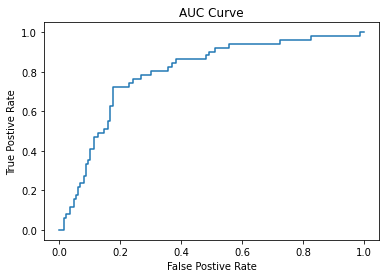

In [85]:
pos_probs=logreg.predict_proba(x_test_final)[::,1]
fpr,tpr,thresold=roc_curve(y_test,pos_probs,pos_label='Y')
plt.plot(fpr,tpr)
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('AUC Curve')


In [86]:
roc_auc_score(y_test,pos_probs)

0.7943150414528227